# <font color=green> _Predicting Heart Disease using Machine Learning_ </font>

### This notebook will contain an end-to-end heart disease classification using fundamental concepts of machine learning and data science.
***

## What is classification ?
The definition of classifying is categorizing something or someone into a certain group or system based on certain characteristics. Here we are classifying whether or not an individual is having a heart disease or not on the basis of given data.
***




## 1. Problem Defination 
> We have a binary classification problem (a sample can only be one of the two things) with us. In this problem to identify whether or not an individual is having a heart disease or not we will be using number of different features (pieces of information) i.e. clinical data/parameters about a patient, example age, chest pain type, fasting blood sugar, etc.


## 2. Data Used 
> The original data came from the [Cleveland database](https://archive.ics.uci.edu/ml/datasets/heart+disease) from UCI Machine Learning Repository.<br>
Howevever, I downloaded it in a formatted way from [Kaggle](https://www.kaggle.com/c/heart-disease-uci/data).
The original database contains 76 attributes, but here only 14 attributes will be used. Attributes (also called features) are the variables what we'll use to predict our target variable.
Attributes and features are also referred to as independent variables and a target variable can be referred to as a dependent variable. Here the independent variables are a patients different medical attributes and the dependent variable is whether or not they have heart disease.


## 3. Evaluation
> The evaluation metric is something you might define at the start of a project.<br>
Since machine learning is very experimental, we might set a goal like,if we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, the project is worth giving our time.<br>
Another reason this is helpful is it provides a rough goal for a machine learning engineer or data scientist to work towards.
However, due to the nature of experimentation, the evaluation metric may change over time.


## 4. Features
> Features are different part of our data we are dealing with. During this part we will start exploring our data and start finding our what we can about the data.
> ### Heart Disease Data Dictionary
Data dictionary describes what we are dealing with. We can't possibly know each and everything about our data so this is where we may have to do our research or ask a subject matter expert (someone who knows about the data) for more.<br>
These are the features/attributes we will be using to predict our target variable (heart disease or no heart disease).
<a id="hddd"></a>

> > 1. age - Age in years
2. sex - (1 = male; 0 = female)
3. cp - Chest Pain Type
    - 0: Typical angina: chest pain related decrease blood supply to the heart.
    - 1: Atypical angina: chest pain not related to heart.
    - 2: Non-anginal pain: typically esophageal spasms (non heart related).
    - 3: Asymptomatic: chest pain not showing signs of disease.
4. trestbps - Resting blood pressure (in mm Hg on admission to the hospital).
    - Anything above 130-140 is typically cause for concern.
5. chol - Serum Cholestoral in mg/dl
    - serum = LDL + HDL + .2 * triglycerides
    - Above 200 is cause for concern
6. fbs - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)
    - '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    - 0: Nothing to note
    - 1: ST-T Wave abnormality
        - Can range from mild symptoms to severe problems.
        - Signals non-normal heart beat.
    - 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - Maximum heart rate achieved.
9. exang - Exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
    - Looks at stress of heart during excercise.
    - Unhealthy heart will stress more.
11. slope - the slope of the peak exercise ST segment
    - 0: Upsloping: Better heart rate with excercise (uncommon).
    - 1: Flatsloping: Minimal change (typical healthy heart).
    - 2: Downslopins: Signs of unhealthy heart.
12. ca - Number of major vessels (0-3) colored by flourosopy.
    - Colored vessel means the doctor can see the blood passing through.
    - The more blood movement the better (no clots).
13. thal - thalium stress result
    - 1,3: normal
    - 6: Fixed defect: used to be defect but now it's okay.
    - 7: Reversable defect: No proper blood movement when excercising.
14. target - Have disease or not (1=yes, 0=no) (= the predicted attribute)


## Getting tools ready
> Here are some libraries we have used while making of the project - 
> - [Pandas](https://pandas.pydata.org/) for data analysis.
> - [Numpy](https://numpy.org/) for numerical operations.
> - [Matplotlib](https://matplotlib.org/)/[Seaborn](https://seaborn.pydata.org/) for plotting or data visualization.
> - [Scikit-learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.

In [1]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models for scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score,plot_roc_curve

## Load Data


In [2]:
df=pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

Compare different columns to each other, compare them to the target variable. Refer back to our data dictionary and remind ourself of what different columns mean.

Since EDA has no real set methodolgy, the following is a short check list you might want to walk through:

- What question(s) are we trying to solve (or prove wrong)?
- What kind of data do we have and how do we treat different types?
- What’s missing from the data and how do we deal with it?
- Where are the outliers and why should we care about them?
- How can we add, change or remove features to get more out of our data?

In [3]:
# Let's see how many positive (1) and negative (0) samples we have in our dataframe
df.target.value_counts() #If we want percentage we can use df.target.value_counts(normalize=True)

1    165
0    138
Name: target, dtype: int64

As we can see the data is **balanced** which means both the values are close to even. **Balanced** column is much more easier to train then compared to **Unbalanced**.

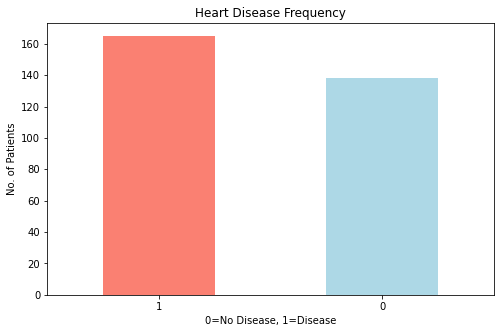

In [4]:
# Plot the value counts with a bar graph
plt.figure(figsize=(8,5))
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.xticks(rotation=0)
plt.title("Heart Disease Frequency")
plt.xlabel("0=No Disease, 1=Disease")
plt.ylabel("No. of Patients");

In [5]:
df.info() # shows a quick insight to the number of missing values you have and what type of data your working with.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe() # shows a range of different metrics about your numerical columns such as mean, max and standard deviation.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Comparing different columns to each other

## Heart Disease Frequency according to Gender

Let's compare our target column with the sex column.

In [7]:
df.sex.value_counts() # 0- women, 1- men

1    207
0     96
Name: sex, dtype: int64

There are 207 males and 96 females in our study.

In [8]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


What can we infer from this?<br>
As we know that there were 96 women and 72 of them are suffering from heart disease, so we can say that around 75% of them are suffering from heart disease.<br> For men, there were 207 men and 93 of them are suffering from heart disease, so around 45% of them are suffering from heart disease.<br> Collectively talking 165 patients are suffering out of 303 which gives us 54% (approx). If there's a person, there's a 54% chance they have heart disease.<br> This can be our very simple baseline, we'll try to beat it with machine learning.

### Making crosstab visual

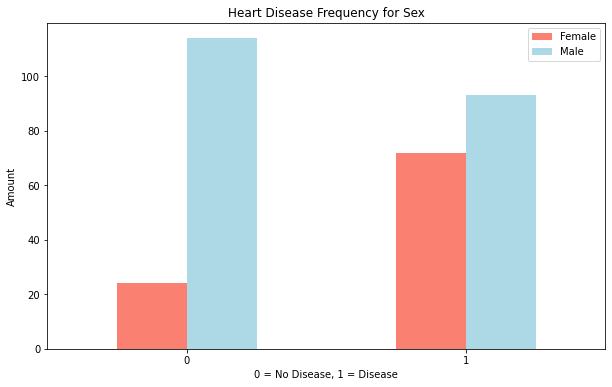

In [9]:
# Create a plot
pd.crosstab(df.target, df.sex).plot(kind="bar",figsize=(10,6),color=["salmon", "lightblue"])

# Add some attributes to it
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

## Age vs Max Heart rate for Heart Disease

Let's try combining a couple of independent variables, such as, age and thalach (maximum heart rate) and then comparing them to our target variable heart disease. [Click here to see data dictionary](#hddd)

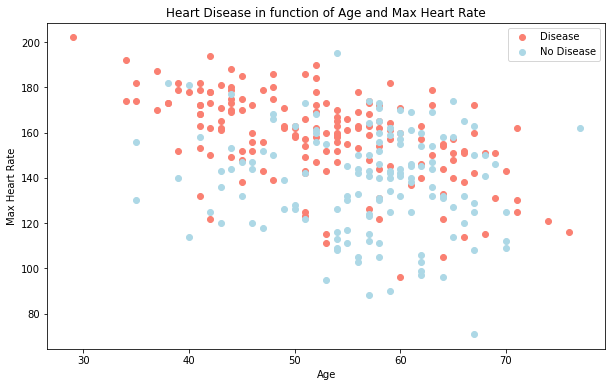

In [10]:
# Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

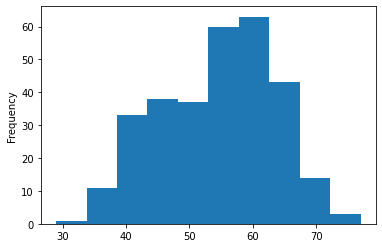

In [11]:
# Checking the distribution of age column with help of histogram.
df.age.plot.hist();

## Heart Disease Frequency per Chest Pain Type
Let's try another independent variable. This time, cp (chest pain).<br> [Click here to see data dictionary](#hddd)

In [12]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


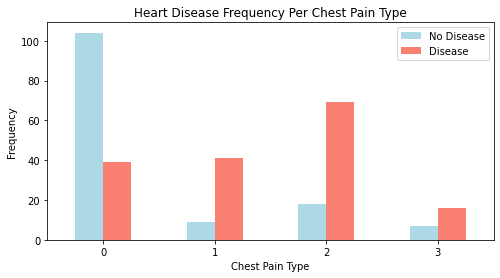

In [13]:
# Create a new crosstab and base plot
pd.crosstab(df.cp, df.target).plot(kind="bar",figsize=(8,4),color=["lightblue", "salmon"])

# Add attributes to the plot to make it more readable
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

- cp - Chest Pain type-
    - 0: Typical angina: chest pain related decrease blood supply to the heart
    - 1: Atypical angina: chest pain not related to heart
    - 2: Non-anginal pain: typically esophageal spasms (non heart related)
    - 3: Asymptomatic: chest pain not showing signs of disease

It's interesting to see that type 1(Atypical angina) and type 2(Non-anginal pain) are said to be non heart related but seems to have a higher ratio of participants with heart disease than not.

## Correlation between independent variables

Comparing all independent variables in one hit.<br>

We can do this using `df.corr()` which will create a [correlation matrix](https://www.displayr.com/what-is-a-correlation-matrix/) for us, in other words, a big table of numbers telling us how related each variable is the other.

In [14]:
# Making a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


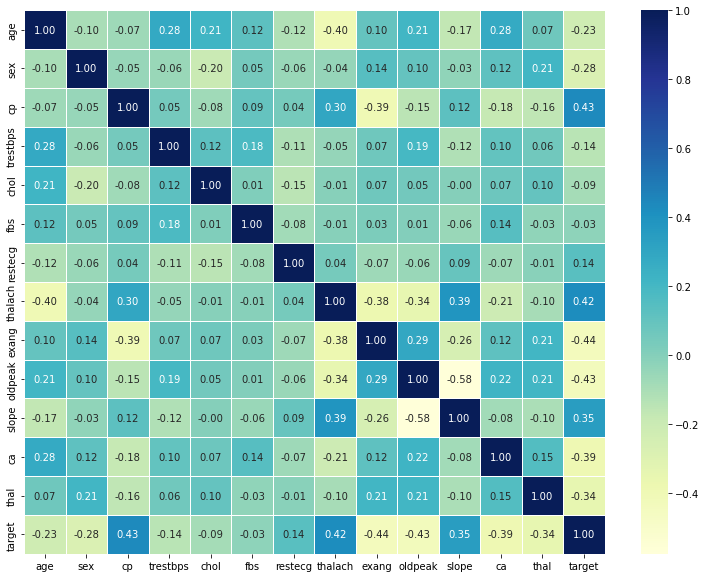

In [15]:
# Let's make it look a little prettier
corr_matrix = df.corr()
plt.figure(figsize=(13, 10))
sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt= ".2f",cmap="YlGnBu");

A higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease).

# Modelling 

We are splitting dependent and independent variable.<br>
Break the data as all columns except target column is left and  store it in variable x. Similarly store only target column in variable y.

In [16]:
#Splitting the data into x and y
x=df.drop("target",axis=1) #Independent variables
y=df.target.values            #Dependent variables

In [17]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [18]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Now that target is seperated from other columns we will now split the data into train and test data. It's clear from the name that train part will be used for training our machine learning model and test part will be used for testing our trained model which we trained using training set.<br> Here the use of test set can be thought of as a real test given to model to see how it performs on the unknown data.

In [19]:
# Splitting the data into train and test sets
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

Here 80% of our data is used to train the model and the rest 20% data is used for testing our model.
And this all is done by using test_size which takes the input as percent of data we want to keep as test set.

In [20]:
# seeing our training data
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [21]:
y_train,len(y_train)

(array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
       dtype=int64),
 242)

242 Samples are used for training our data.

In [22]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [23]:
y_test,len(y_test)

(array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64),
 61)

We have got 61 samples to test our data on.

### Model Choices
Now we've got our data prepared, we can start to fit models. We'll be using the following and comparing their results.

1. Logistic Regression - `LogisticRegression()`
2. K-Nearest Neighbors - `KNeighborsClassifier()`
3. RandomForest - `RandomForestClassifier()`

In [24]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    np.random.seed(42)
    # Making a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [25]:
model_scores = fit_and_score(models=models,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)
model_scores

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparision

Since we've saved our models scores to a dictionary, we can plot them by first converting them to a DataFrame.

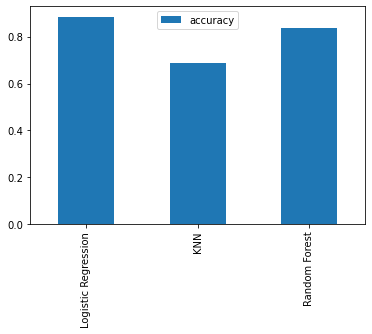

In [26]:
model_compare= pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

Now we have got a baseline model and we know a model's first predictions aren't always what we should base our next step off.
Now we will look at- 
* Hyperparameter tuning 
* Feature importance
* Confussion matrix
* Cross validation
* Precision
* Recall
* F1 score
* Classification report 
* ROC curve
* AUC (Area under the curve)

### Hyperparameter tuning 

#### Let's tune KNN

In [27]:
train_scores=[]
test_scores=[]
# Create a list of different values for n_neighbors
neighbors=range(1,21)
# Setup KNN Instance
knn=KNeighborsClassifier()
#Loop through different n-neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    #Fit the algorithm
    knn.fit(x_train,y_train)
    #Updating the training test scores list
    train_scores.append(knn.score(x_train,y_train))
    #Updating the test score list 
    test_scores.append(knn.score(x_test,y_test))
#Looking at knn's test scores
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [28]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


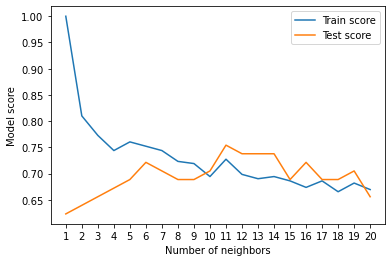

In [29]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Looking at the graph, `n_neighbors = 11` seems best.

Even knowing this, the `KNN's model` performance was nothing compared to `LogisticRegression` or the `RandomForestClassifier`.

Because of this, we'll `discard KNN` and focus on the other two.

We've tuned KNN by hand but let's see how we can `LogisticsRegression` and `RandomForestClassifier` using `RandomizedSearchCV`.

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune -
1. Logistic Regression
2. RandomForestClassifier <br>

Using RandomizedSearchCV

Creating a hyperparameter grid for LogisticRegression

In [30]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C":np.logspace(-4,4,20),"solver":["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV

In [31]:
#tune logistic regression model
np.random.seed(42)

#setup random hyperparameter search for logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [32]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

In [33]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

Now that we have tuned LogisticRegression(), let's do the same for `RandomForestClassifier()`.

In [34]:
#Setup Random Seed
np.random.seed(42)
#Setup random hyperparameter search for R.F.C.()
rs_rf = RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)
#Fit Random hyperparameter search model for RandomForestClassifier
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [35]:
rs_rf.score(x_test,y_test)

0.8688524590163934

In [36]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

# Using GridSearchCV

The difference between RandomizedSearchCV and GridSearchCV is where RandomizedSearchCV searches over a grid of hyperparameters performing n_iter combinations, GridSearchCV will test every single possible combination.

## Hyperparameter tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV....

In [37]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid={"C":np.logspace(-4,4,30),"solver":["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [38]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

In [39]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [40]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

If there are a large amount of hyperparameters combinations in your grid, `GridSearchCV` may take a long time to try them all out. This is why it's a good idea to start with `RandomizedSearchCV`, try a certain amount of combinations and then use `GridSearchCV` to refine them.

# Evaluating a classification model, beyond accuracy

We we evaluate on the basis of :
- ROC Curve
- AUC Score
- Confussion Matrix
- Precision
- Recall
- F1-score

To make comparision and evaluate our trained model, first we need to make predictions.

In [41]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)

In [42]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [43]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

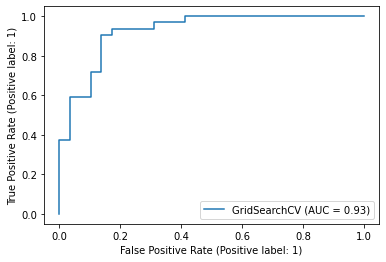

In [44]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg,x_test,y_test)

In [45]:
# Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


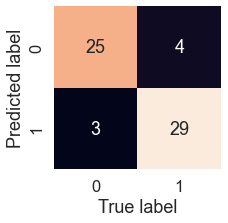

In [46]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plot a nice looking confusion matrix using Seaborn's heatmap()
    """    
    fig, ax = plt.subplots(figsize=(3,3))
    ax= sns.heatmap(confusion_matrix(y_test,y_preds),
                   annot=True, cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test,y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validation precision, recall and F1 score.

In [47]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation matrix using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score`.

In [48]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [50]:
# Create a new classifier with best parameteres
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")

In [54]:
# Cross-validated accuracy
cv_acc= cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [55]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [56]:
# Cross-validated precision 
cv_precision = cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [57]:
# Cross-validated recall
cv_recall = cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall 

0.9212121212121213

In [58]:
# Cross-validation f1-score
cv_f1score = cross_val_score(clf,x,y,cv=5,scoring="f1")
cv_f1score = np.mean(cv_f1score)
cv_f1score

0.8673007976269721

<AxesSubplot:title={'center':'Cross-validated classification metrics'}>

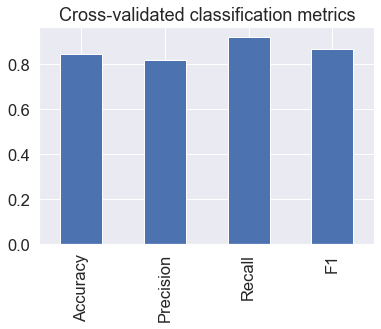

In [59]:
# Visualize cross-validation metrics
cv_metrices = pd.DataFrame({"Accuracy":cv_acc,
                            "Precision":cv_precision,
                            "Recall":cv_recall,
                            "F1":cv_f1score},
                           index=[0])

cv_metrices.T.plot.bar(title="Cross-validated classification metrics",legend=False)

### Feature Importance
 
Feature importance is another way of asking, "which feature contributed most to the outcomes of the model and how do they contribute?"

Finding feature importance is different for each machine learning model.

Let's find the feature importance for our LogisticRegression model....

In [61]:
# Fit an instance of LogisticRegression
clf =LogisticRegression(C=0.20433597178569418, solver="liblinear")
clf.fit(x_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [63]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [62]:
# Check coef_ (short for Coefficient)
clf.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [64]:
# Match coef's of the feature to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

<AxesSubplot:title={'center':'Feature Importance'}>

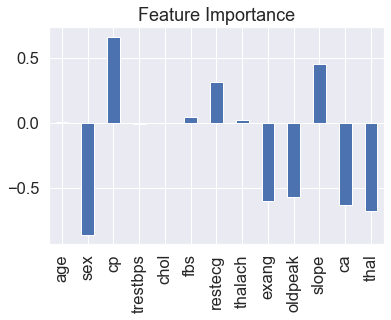

In [65]:
# Visualize feature importance 
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False)

In [70]:
pd.crosstab(df["sex"], df["target"])# see the ratio
# In case of -ve coefficient i.e. as value for sex increases the target value decreases.

target,0,1
sex,,
0,24,72
1,114,93


In [73]:
pd.crosstab(df["cp"], df["target"])
# In case of +ve coefficient i.e. as value for cp increases the target value increases.

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [72]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
